<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [67]:
import numpy as np
import pandas as pd
import pymssql

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import squarify

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

In [3]:
# Connection information
server = '45.117.83.230'
port = 1433
username = 'Student1'
password = '@Mindxdream2023'
database = 'OLIST'

# Connect to the database
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [4]:
df_orders = pd.read_sql("SELECT * FROM dbo.olist_orders_dataset", connection)
df_customers = pd.read_sql("SELECT * FROM dbo.olist_customers_dataset", connection)
df_geolocation = pd.read_sql("SELECT * FROM dbo.olist_geolocation_dataset", connection)
df_items = pd.read_sql("SELECT * FROM dbo.olist_order_items_dataset", connection)
df_reviews = pd.read_sql("SELECT * FROM dbo.olist_order_reviews_dataset", connection)
df_products = pd.read_sql("SELECT * FROM dbo.olist_products_dataset", connection)
df_sellers = pd.read_sql("SELECT * FROM dbo.olist_sellers_dataset", connection)
df_payments  = pd.read_sql("SELECT * FROM dbo.olist_order_payments_dataset", connection)

In [5]:
# Merging Dataframes
df = df_orders.merge(df_items, on="order_id", how="inner")
df = df.merge(df_payments, on="order_id", how="inner", validate="m:m")
df = df.merge(df_reviews, on="order_id", how="inner")
df = df.merge(df_products, on="product_id", how="inner")
df = df.merge(df_customers, on="customer_id", how="inner")
df = df.merge(df_sellers, on="seller_id", how="inner")

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [6]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,2999.0,872.0,1,credit_card,1,1812.0,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40,268,4,500,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,2999.0,872.0,3,voucher,1,200.0,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40,268,4,500,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,2999.0,872.0,2,voucher,1,1859.0,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40,268,4,500,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,11870.0,2276.0,1,boleto,1,14146.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumaria,29,178,1,400,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,15990.0,1922.0,1,credit_card,3,17912.0,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18,2018-08-22 19:07:58,automotivo,46,232,1,420,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115634 entries, 0 to 115633
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115634 non-null  object        
 1   customer_id                    115634 non-null  object        
 2   order_status                   115634 non-null  object        
 3   order_purchase_timestamp       115634 non-null  datetime64[ns]
 4   order_approved_at              115620 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115634 non-null  datetime64[ns]
 6   order_delivered_customer_date  115634 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115634 non-null  datetime64[ns]
 8   order_item_id                  115634 non-null  int64         
 9   product_id                     115634 non-null  object        
 10  seller_id                      115634 non-null  object        
 11  

In [8]:
# Đổi tên feature vì sai chính tả
df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)

In [9]:
# Đảm bảo order_purchase_timestamp và  order_delivered_customer_date, order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date
# review_creation_date, review_answer_timestamp là dữ liệu date time.
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"], format = "mixed")
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"], format = "mixed")
df["order_approved_at"] = pd.to_datetime(df["order_approved_at"], format = "mixed")
df["order_delivered_carrier_date"] = pd.to_datetime(df["order_delivered_carrier_date"], format = "mixed")
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"], format = "mixed")
df["review_creation_date"] = pd.to_datetime(df["review_creation_date"], format = "mixed")
df["review_answer_timestamp"] = pd.to_datetime(df["review_answer_timestamp"], format = "mixed")

In [10]:
# object → ép lại
df["product_weight_g"] = pd.to_numeric(df["product_weight_g"], errors="coerce")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115634 entries, 0 to 115633
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115634 non-null  object        
 1   customer_id                    115634 non-null  object        
 2   order_status                   115634 non-null  object        
 3   order_purchase_timestamp       115634 non-null  datetime64[ns]
 4   order_approved_at              115620 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115634 non-null  datetime64[ns]
 6   order_delivered_customer_date  115634 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115634 non-null  datetime64[ns]
 8   order_item_id                  115634 non-null  int64         
 9   product_id                     115634 non-null  object        
 10  seller_id                      115634 non-null  object        
 11  

In [12]:
print("Data describe:")
list_feature_no__need_describe = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                     "order_delivered_customer_date", "order_estimated_delivery_date", "order_item_id", "shipping_limit_date",
                     "review_creation_date", "review_answer_timestamp", "customer_zip_code_prefix", "seller_zip_code_prefix"]
cm = sns.light_palette("blue", as_cmap=True)
display(df.drop(columns=list_feature_no__need_describe, axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
price,115634.000000,12064.258488,18269.811630,85.000000,3990.000000,7490.000000,13490.000000,673500.000000
freight_value,115634.000000,2005.650760,1583.525925,0.000000,1308.000000,1632.000000,2121.000000,40968.000000
payment_sequential,115634.000000,1.093735,0.729776,1.000000,1.000000,1.000000,1.000000,29.000000
payment_installments,115634.000000,2.946071,2.781020,0.000000,1.000000,2.000000,4.000000,24.000000
payment_value,115634.000000,17240.640798,26589.202328,0.000000,6086.000000,10805.000000,18948.000000,1366408.000000
review_score,115634.000000,4.034229,1.385694,1.000000,4.000000,5.000000,5.000000,5.000000
product_name_length,115634.000000,48.768018,10.033831,5.000000,42.000000,52.000000,57.000000,76.000000
product_description_lenght,115634.000000,785.802861,652.382965,4.000000,346.000000,600.000000,983.000000,3992.000000
product_photos_qty,115634.000000,2.205528,1.717783,1.000000,1.000000,1.000000,3.000000,20.000000
product_weight_g,115633.000000,2113.989951,3781.554532,0.000000,300.000000,700.000000,1800.000000,40425.000000


**1. Giá bán sản phẩm (`price`)**

* **Giá trung bình** mỗi đơn hàng: ~12,064 BRL
* **Giá cao nhất** lên đến: 673,500 BRL → đây có thể là đơn hàng đặc biệt.
* **50% đơn hàng có giá dưới** 7,490 BRL
* Giá trị mean lớn hơn rất nhiều giá trị median điều này cho thấy tồn tại nhiều giá trị Outlier.

**2. Phí vận chuyển (`freight_value`)**

* Trung bình khách hàng trả \~2,006 BRL cho phí ship.
* Có đơn hàng có phí ship tới 40,968 BRL (rất lớn).
* Tương tự nhue price thì mean lớn hơn median  rất nhiều điều này cho thấy nhiều giá trị Outlier (có nhiều đơn hàng với chi phí vận chuyển rất lớn).

**3. Thanh toán nhiều lần (`payment_sequential`)**

* Gần như tất cả khách hàng **chỉ thanh toán 1 lần**.
* Chỉ vài trường hợp chia thành nhiều lần (max = 29).

**4. Trả góp (`payment_installments`)**
* Trung bình khách hàng chọn trả góp khoảng **3 kỳ**.
* Có khách trả góp đến **24 kỳ (2 năm)**.

**5. Tổng số tiền đã thanh toán (`payment_value`)**

* Trung bình một khách hàng thanh toán: **17,240 BRL**
* Có đơn hàng đến **1,364,608 BRL** → cực kỳ lớn, cần xác minh.

**6. Điểm đánh giá (`review_score`)**

* Trung bình: 4.03 / 5 → khá tốt.
* 50% đánh giá là **5 sao**.

**7. Độ dài tên & mô tả sản phẩm**

* Mô tả sản phẩm trung bình: \~786 ký tự → khá chi tiết.
* Tên sản phẩm trung bình 48 ký tự → đủ rõ ràng.

**8. Số lượng ảnh sản phẩm (`product_photos_qty`)**

* Trung bình mỗi sản phẩm có khoảng 2 ảnh.
* Có sản phẩm chỉ có 1 ảnh.

**9. Kích thước sản phẩm**

* Có sản phẩm có kích thước bằng **0** → **khả năng lỗi nhập liệu**.
* Một số sản phẩm rất lớn → ảnh hưởng phí vận chuyển.

In [13]:
print("Data describe:")
list_feature_no__need_describe_cater = ["order_id", "customer_id", "product_id", "seller_id", "review_id", "customer_unique_id"]
df.drop(columns=list_feature_no__need_describe_cater, axis=1).describe(include=["category", "object"]).T

Data describe:


,count,unique,top,freq
order_status,115634,7,delivered,113233
payment_type,115634,4,credit_card,85291
review_comment_title,13808,4463,Recomendo,489
review_comment_message,48909,35181,Muito bom,253
product_category_name,115634,73,cama_mesa_banho,11847
customer_city,115634,4093,sao paulo,18268
customer_state,115634,27,SP,48809
seller_city,115634,604,sao paulo,28819
seller_state,115634,23,SP,82442


**1. Trạng thái đơn hàng (`order_status`)**

* Tổng cộng có **7 trạng thái đơn hàng**.
* Gần **98% đơn hàng ở trạng thái "delivered" (113233 / 115634)**.
* Các trạng thái khác như `canceled`, `unavailable`, `processing` xuất hiện rất ít.
* **→ Dataset mất cân bằng mạnh**.

**2. Phương thức thanh toán (`payment_type`)**

* Có **4 phương thức** thanh toán chính.
* **Thẻ tín dụng (credit_card)** là phổ biến nhất: \~85k đơn.
* Các phương thức khác: `boleto`, `voucher`, `debit_card` chiếm tỷ lệ thấp.
* **→ Khách hàng có xu hướng dùng **credit_card** để thanh toán**.

**3. Tiêu đề đánh giá (`review_comment_title`)**

* Chỉ có khoảng **13,808 đơn có tiêu đề đánh giá** (\~12%).
* Tổng cộng có đến **4,463 tiêu đề khác nhau**, đa số chỉ xuất hiện 1 lần.
* Câu phổ biến nhất là **“Recomendo”** (khuyên dùng).

**4. Nội dung đánh giá (`review_comment_message`)**

* Có **48,909 đơn có bình luận** (\~42%).
* Bao gồm **35,181 thông điệp khác nhau**, đa phần chỉ lặp lại ít lần.
* Câu phổ biến nhất là **“Muito bom” (Rất tốt)** – 253 lần.

**5. Danh mục sản phẩm (`product_category_name`)**

* Gồm **73 danh mục** sản phẩm khác nhau.
* Phổ biến nhất là **“cama_mesa_banho”** – 11,847 đơn hàng.
* Nhiều danh mục có số đơn hàng rất thấp.

**6. Thành phố của khách hàng (`customer_city`)**

* Có đến **4,093 thành phố khác nhau**.
* Phổ biến nhất là **“sao paulo”** – 18,268 đơn hàng (\~15.8%).

**7. Bang của khách hàng (`customer_state`)**

* Gồm **27 bang** → tương ứng 27 bang ở Brazil.
* **Bang SP (São Paulo)** chiếm tỷ lệ cao nhất – 48,809 đơn (\~42%).

**8. Bang của người bán (`seller_state`)**

* Có **23 bang khác nhau** xuất hiện trong dữ liệu người bán.
* **SP tiếp tục chiếm ưu thế tuyệt đối** – 82,442 đơn (\~71%).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Handling Missing Value

In [14]:
def displayNULL(df, dataset_name=None, style=1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            null_count = df[column].isnull().sum()
            if null_count > 0:
                print(f"Column: {column} → {null_count} missing")
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)

        print("=" * 50)
        print(f"Missing Value Analysis: {dataset_name}")
        print("=" * 50)

        if missing_count == 0:
            print(f"No missing values detected in {rows:,} rows.")
        else:
            print(f"Found {missing_count:,} missing values in {rows:,} rows.")
            print("-" * 50)
            print(f"{"Column":<30} {"Missing":>10} {"% Missing":>12}")
            print("-" * 50)
            
            # Tạo bảng missing
            null_df = df.isnull().sum().reset_index()
            null_df.columns = ["Column", "Missing"]
            null_df = null_df[null_df["Missing"] > 0]
            null_df["% Missing"] = (null_df["Missing"] / rows * 100).round(2)

            # In ra bảng
            for _, row in null_df.iterrows():
                print(f"{row["Column"]:<30} {int(row["Missing"]):>10,} {row["% Missing"]:>11.2f}%")

displayNULL(df, dataset_name="Olist Data", style=2)

Missing Value Analysis: Olist Data
Found 168,569 missing values in 115,634 rows.
--------------------------------------------------
Column                            Missing    % Missing
--------------------------------------------------
order_approved_at                      14        0.01%
review_comment_title              101,826       88.06%
review_comment_message             66,725       57.70%
product_weight_g                        1        0.00%
product_length_cm                       1        0.00%
product_height_cm                       1        0.00%
product_width_cm                        1        0.00%


In [15]:
df.drop(columns="review_comment_title", axis=1, inplace=True)

In [16]:
cols_to_check = ["order_approved_at", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
df = df.dropna(subset=cols_to_check)
print("Missing value summary after dropping:")
print(df[cols_to_check].isnull().sum())

Missing value summary after dropping:
order_approved_at    0
product_weight_g     0
product_length_cm    0
product_height_cm    0
product_width_cm     0
dtype: int64


## Checking duplicate Value

In [17]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"{dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"No duplicates found in {total_rows:,} rows")
    else:
        print(f"{duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df, dataset_name="Olist Data")
duplicate_summary["Data"] = {
    "duplicates": df.duplicated().sum(),
    "total_rows": len(df)
}

Olist Data Duplicate Analysis
No duplicates found in 115,619 rows


## Checking Outlier Value

In [18]:
num_features = ["price", "freight_value", "payment_sequential", "payment_installments", "payment_value", "review_score", "product_name_length",
                "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"{dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df, dataset_name="Olist Data")

Olist Data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,price,8695,"[27900.0, 44500.0, 33900.0, 36900.0, 29900.0, 32990.0, 32990.0, 54400.0, 39490.0, 75900.0, 53590.0, 58990.0, 28199.0, 35990.0, 41000.0, 35950.0, 67900.0, 28990.0, 27999.0, 42800.0, 32000.0, 35970.0, 35970.0, 38350.0, 32500.0, 39465.0, 84400.0, 29900.0, 41200.0, 114800.0, 109900.0, 199900.0, 34990.0, 30000.0, 29200.0, 29650.0, 269000.0, 30999.0, 35590.0, 35900.0, 55000.0, 169500.0, 27990.0, 38000.0, 29990.0, 89999.0, 27999.0, 89500.0, 55900.0, 28302.0, 48065.0, 31898.0, 134900.0, 33500.0, 35579.0, 28900.0, 59900.0, 41900.0, 59900.0, 29350.0, 69990.0, 32999.0, 29900.0, 32990.0, 79990.0, 32890.0, 39900.0, 29490.0, 48500.0, 48500.0, 63600.0, 29999.0, 79800.0, 79800.0, 38000.0, 29500.0, 29500.0, 29500.0, 159900.0, 38800.0, 32000.0, 59900.0, 29900.0, 29900.0, 104500.0, 35900.0, 64951.0, 38000.0, 29990.0, 57900.0, 36400.0, 48899.0, 29900.0, 59990.0, 29900.0, 37000.0, 27990.0, 29900.0, 33900.0, 213999.0, ...]"
1,freight_value,12476,"[5758.0, 4864.0, 4864.0, 3419.0, 3800.0, 6317.0, 3420.0, 8248.0, 8248.0, 5113.0, 3737.0, 3928.0, 3928.0, 5301.0, 5779.0, 5569.0, 4259.0, 3532.0, 3396.0, 0.0, 0.0, 6823.0, 3888.0, 3543.0, 5779.0, 4033.0, 5465.0, 3574.0, 3896.0, 9802.0, 3715.0, 12984.0, 12984.0, 3704.0, 5914.0, 3452.0, 4545.0, 10743.0, 3538.0, 4558.0, 3739.0, 7986.0, 3821.0, 5277.0, 6124.0, 4133.0, 4780.0, 0.0, 3435.0, 4380.0, 14599.0, 3624.0, 3353.0, 12974.0, 3727.0, 3705.0, 13173.0, 4167.0, 3548.0, 4486.0, 4238.0, 5383.0, 5800.0, 4648.0, 3842.0, 4499.0, 3407.0, 3407.0, 6687.0, 3629.0, 5346.0, 3487.0, 3487.0, 78.0, 3372.0, 4214.0, 6510.0, 0.0, 3506.0, 3675.0, 3675.0, 0.0, 7478.0, 3438.0, 3929.0, 4203.0, 6226.0, 6226.0, 3948.0, 3894.0, 3479.0, 5118.0, 5510.0, 4761.0, 4761.0, 3415.0, 5689.0, 5689.0, 3876.0, 3674.0, ...]"
2,payment_sequential,4948,"[3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 2, 4, 3, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 4, 2, 5, 3, 7, 9, 6, 2, 3, 6, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, ...]"
3,payment_installments,7921,"[10, 10, 10, 10, 9, 10, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 9, 10, 10, 9, 10, 10, 10, 10, 10, 10, 13, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 15, 10, 10, 10, 10, 10, ...]"
4,payment_value,9331,"[50817.0, 38633.0, 82476.0, 82476.0, 39260.0, 39260.0, 39260.0, 39260.0, 57436.0, 40979.0, 77208.0, 55440.0, 60990.0, 51839.0, 51839.0, 51839.0, 40249.0, 44532.0, 38982.0, 38982.0, 39346.0, 69885.0, 42367.0, 42367.0, 44651.0, 75394.0, 75394.0, 40332.0, 41912.0, 86501.0, 99849.0, 99849.0, 99849.0, 99849.0, 43670.0, 125543.0, 111960.0, 203109.0, 38398.0, 38398.0, 49940.0, 49940.0, 275124.0, 69599.0, 172767.0, 41353.0, 42964.0, 92104.0, 91602.0, 59627.0, 50212.0, 148073.0, 40065.0, 78312.0, 78312.0, 78312.0, 78312.0, 78312.0, 78312.0, 69615.0, 69615.0, 69615.0, 69615.0, 69615.0, 58794.0, 58794.0, 66587.0, 45529.0, 61990.0, 72205.0, 47970.0, 47970.0, 47970.0, 82808.0, 44252.0, 44252.0, 43848.0, 100830.0, 100830.0, 65184.0, 42400.0, 43089.0, 41583.0, 169205.0, 70768.0, 70768.0, 70768.0, 70768.0, 41359.0, 69561.0, 107512.0, 70619.0, 39925.0, 39925.0, 41593.0, 59455.0, 45538.0, 45538.0, 51290.0, 61769.0, ...]"
5,review_score,18574,"[1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, ...]"
6,product_name_length,799,"[18, 18, 19, 19, 11, 14, 14, 18, 18, 19, 19, 10, 10, 10, 10, 18, 12, 10, 10, 14, 16, 16, 16, 13, 12, 15, 19, 18, 19, 18, 18, 14, 16, 16, 19, 15, 15, 14, 16, 1

**Insights**

**Missing Values**

- `review_comment_title`: Là dòng tiêu đề ngắn của review. Rất ngắn, thường là vài từ (ví dụ: “Ótimo”, “Recomendo”), chỉ có 4,463 tiêu đề khác nhau,tỷ lệ missing lên đến 88.06% và quan trọng nhất nó rất hạn chế để phân tích nên column này sẽ remove.
- `review_comment_message`: Là dòng review chi tiết từ khách hàng. Chúng ta sẽ giữ lại column này  để phân tích xem nhóm khách  hàng "Best Customer", "Churn Customer" sẽ có bình luận như thế nào tích cực hay tiêu cực.Tuy bị "missing value" nhưng  rất quan trọng nên không thể remove. Thêm nữa chúng ta cũng không nên fill value cho column này vì làm mất đi tính thực tế dữ liệu (Dữ liệu fill vào có thể không đúng).
- `order_approved_at`, `product_weight_g`, `product_length_cm`,  `product_height_cm`, `product_width_cm`: Sẽ drop những row nào bị missing value vì số lượng cũng quá ít nên không có ảnh hưởng.

**Duplicate Records**

- Không có hiện tượng **Duplicate** trong dữ liệu.

**Outliers Records**

- Giá trị Outlier rất nhiều ở các column. Và chúng ta không thể remove chúng vì chúng là những giá trị thực tế.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

## RFM

Chúng ta sẽ sử dụng các column:
`order_purchase_timestamp`

* **Kiểu dữ liệu**: `datetime`
* **Ý nghĩa**: Thời điểm khách hàng **đặt hàng thành công** trên hệ thống.
* Đây là **mốc thời gian chính** để tính **Recency** trong RFM hoặc phân tích hành vi mua sắm theo thời gian.

 `customer_unique_id`

* **Kiểu dữ liệu**: `string`
* **Ý nghĩa**: ID **duy nhất cho mỗi khách hàng**, **không thay đổi** dù người đó mua nhiều đơn hàng.
* Một khách hàng có thể xuất hiện nhiều lần với các `order_id` khác nhau, nhưng `customer_unique_id` không đổi.

`order_id`

* **Kiểu dữ liệu**: `string`
* **Ý nghĩa**: Mã đơn hàng – mỗi lần mua hàng tương ứng với 1 `order_id`.
* Một khách hàng (`customer_unique_id`) có thể có nhiều `order_id`.

`price`

* **Kiểu dữ liệu**: `float`
* **Ý nghĩa**: Tổng giá trị sản phẩm trong 1 dòng đơn hàng (có thể là 1 phần của đơn lớn nếu có nhiều sản phẩm).
* **Không bao gồm phí vận chuyển (`freight_value`)**
* Khi tổng hợp theo `order_id` thì sẽ ra **giá trị đơn hàng**, còn khi tổng hợp theo `customer_unique_id` → tính được **Monetary** trong RFM.

In [19]:
# lấy thời điểm đơn hàng gần nhất trong dữ liệu, cộng thêm 1 ngày để đảm bảo tính toán recency dương (tránh 0 ngày cho khách gần nhất).
recency_date = df["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

rfm_df = df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (recency_date - x.max()).days,   # Recency
    "order_id": "nunique",                                                 # Frequency
    "price": "sum"                                                         # Monetary
}).reset_index()

rfm_df.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

## Customer segmentation based on RFM Score

| Nhóm                 | Mô tả                                           | Điều kiện RFM   |
| -------------------- | ----------------------------------------------- | --------------- |
| **Best Customers** | Mua thường xuyên, gần đây, chi tiêu cao         | `R=4, F=4, M=4` |
| **At Risk**       | Trước kia mua nhiều nhưng đã lâu không quay lại | `R=1, F=4`      |
| **New Customers** | Mới mua lần đầu gần đây                         | `R=4, F=1`      |
| **Churn**          | Lâu rồi không quay lại, chi tiêu thấp           | `R=1, F=1, M=1` |
| **Other**          | Nhóm khách hàng còn lại           | Khác với những điều kiện trên |

In [20]:
rfm_df["R"] = pd.qcut(rfm_df["Recency"], 4, labels=[4,3,2,1])       # Recency càng thấp càng tốt
rfm_df["F"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm_df["M"] = pd.qcut(rfm_df["Monetary"], 4, labels=[1,2,3,4])

rfm_df["RFM_Score"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)

In [21]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,12990.0,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,1890.0,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,6900.0,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,2599.0,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,18000.0,2,1,4,214


In [22]:
def classify_rfm(row):
    r, f, m = row["R"], row["F"], row["M"]

    if r == 4 and f == 4 and m == 4:
        return "Best Customers"
    elif r == 1 and f == 4:
        return "At Risk"
    elif r == 4 and f == 1:
        return "New Customers"
    elif r == 1 and f == 1 and m == 1:
        return "Churn"
    else:
        return "Other"

rfm_df["RFM_Segment"] = rfm_df.apply(classify_rfm, axis=1)

In [23]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,12990.0,4,1,3,413,New Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,1890.0,4,1,1,411,New Customers
2,0000f46a3911fa3c0805444483337064,542,1,6900.0,1,1,2,112,Other
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,2599.0,2,1,1,211,Other
4,0004aac84e0df4da2b147fca70cf8255,293,1,18000.0,2,1,4,214,Other


### Các nhóm khách hàng có đặc điểm như thế nào? Số lượng?

In [24]:
# Refer on google
# Chia layout với header rõ ràng, căn giữa và format số đẹp
summary_rfm = (
    rfm_df.groupby("RFM_Segment").agg({
        "Recency": ["mean", "min", "max"],
        "Frequency": ["mean", "min", "max"],
        "Monetary": ["mean", "min", "max"],
        "customer_unique_id": "count"
    })
    .sort_values(("Monetary", "mean"), ascending=False)
    .style
    .set_caption("RFM Summary by Segment")
    .format(precision=0)  # Làm tròn số
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
    ])
    .set_properties(**{
        "text-align": "center",
        "font-size": "12px"
    })
    .background_gradient(subset=[("Recency", "mean"), ("Frequency", "mean"), ("Monetary", "mean")], cmap="Blues")
)
summary_rfm

In [25]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [26]:
rfm_df = rfm_df.astype({
    "R": "int8",
    "F": "int8",
    "M": "int8"
})

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

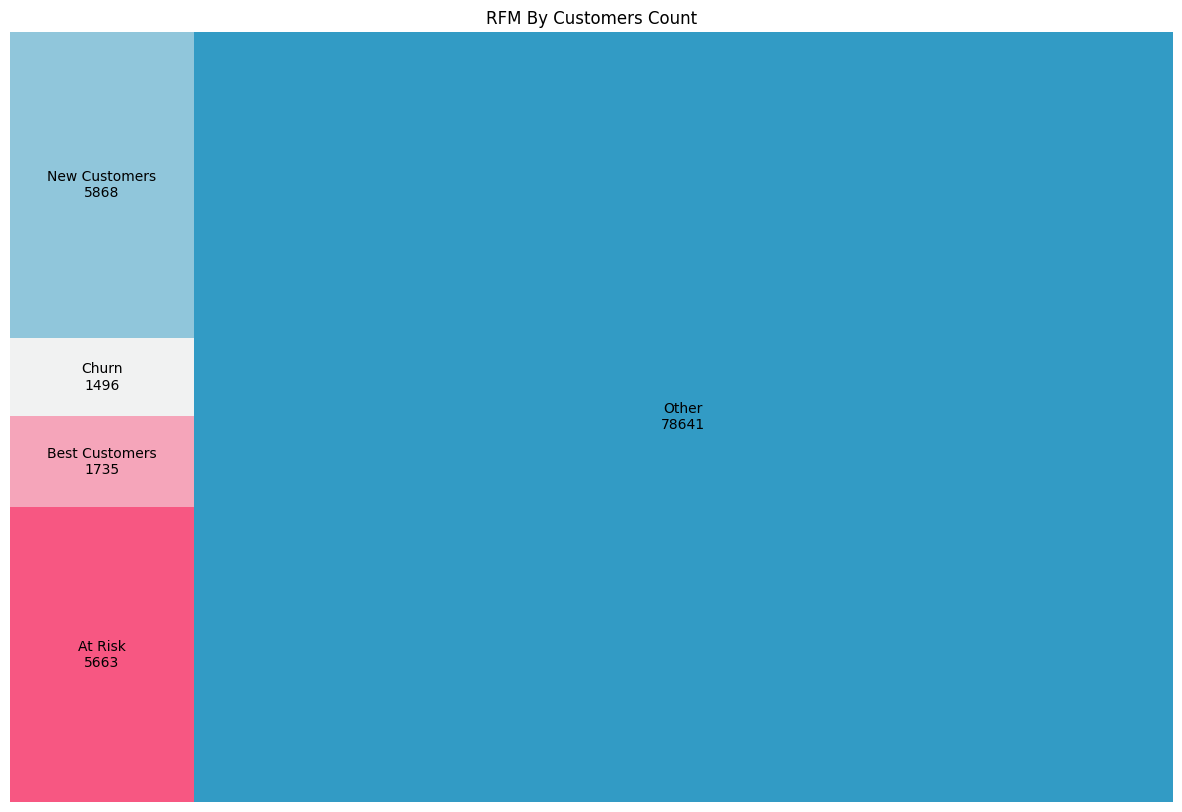

In [27]:
rfm_summarised = rfm_df.groupby (by = "RFM_Segment", as_index = False)\
                        .agg (
                            customersCount = ("customer_unique_id", "nunique"),
                            total_R = ("R", "sum"),
                            total_F = ("F", "sum"),
                            total_M = ("M", "sum")
                        )

plt.figure(figsize=(15, 10))
squarify.plot(
    rfm_summarised["customersCount"].to_list(),
    label = rfm_summarised["RFM_Segment"] + "\n" + rfm_summarised["customersCount"].astype(str),
    color = color(n_colors=5)
)
plt.title ("RFM By Customers Count")
plt.axis("off")

**Ý nghĩa các cột**

* **Recency (mean/min/max)**: Số ngày kể từ lần mua gần nhất → **càng thấp càng tốt**.
* **Frequency**: Số lần mua hàng → **càng nhiều càng tốt**.
* **Monetary**: Tổng số tiền đã chi tiêu → **càng cao càng tốt**.
* **customer_unique_id (count)**: Số khách hàng trong mỗi nhóm.

**Phân tích từng nhóm**

`Best Customers`

* **Recency trung bình = 63.8** → Họ mua hàng **gần đây**.
* **Tần suất mua = 1.35**, cao nhất toàn bảng.
* **Chi tiêu trung bình = 15,998**, rất cao.
* Đây là nhóm khách **VIP**, **trung thành**. Có **1.735 khách**.

`At Risk`

* **Recency = 457 ngày**, tức là đã **rất lâu không mua lại**.
* Nhưng: **Frequency = 1.11**, **Monetary = 16,620** → Trước đây từng **mua nhiều và chi tiêu cao**.
* Nhóm này **rất có giá trị**, cần **có những chiến lược để kéo họ lại**, có tới **5.663 khách**.

`Other`

* Recency = 240 ngày (trung bình), Frequency = 1.02, Monetary = 14,554.
* Nhóm này là **trung lập**, có thể là khách vãn lai chỉ mua vài lần.
* Lớn nhất với **78.641 khách hàng** → chiếm phần lớn dataset.

`New Customers`

* **Recency thấp = 62.7 ngày** → vừa mới mua.
* Nhưng Frequency = 1 (mới mua lần đầu), Monetary = 14,244.
* Nhóm **tiềm năng**, cần quan tâm nhiều hơn để biến thành khách trung thành. Có **5.868 khách**.

`Churn (Mất khách)`

* **Recency = 461 ngày** → rất lâu không quay lại.
* Frequency = 1, Monetary = 2.944 → **rất ít giá trị**.
* Nhóm này có thể đã **rời bỏ**, khó tái kích hoạt. Có **1.496 khách**.

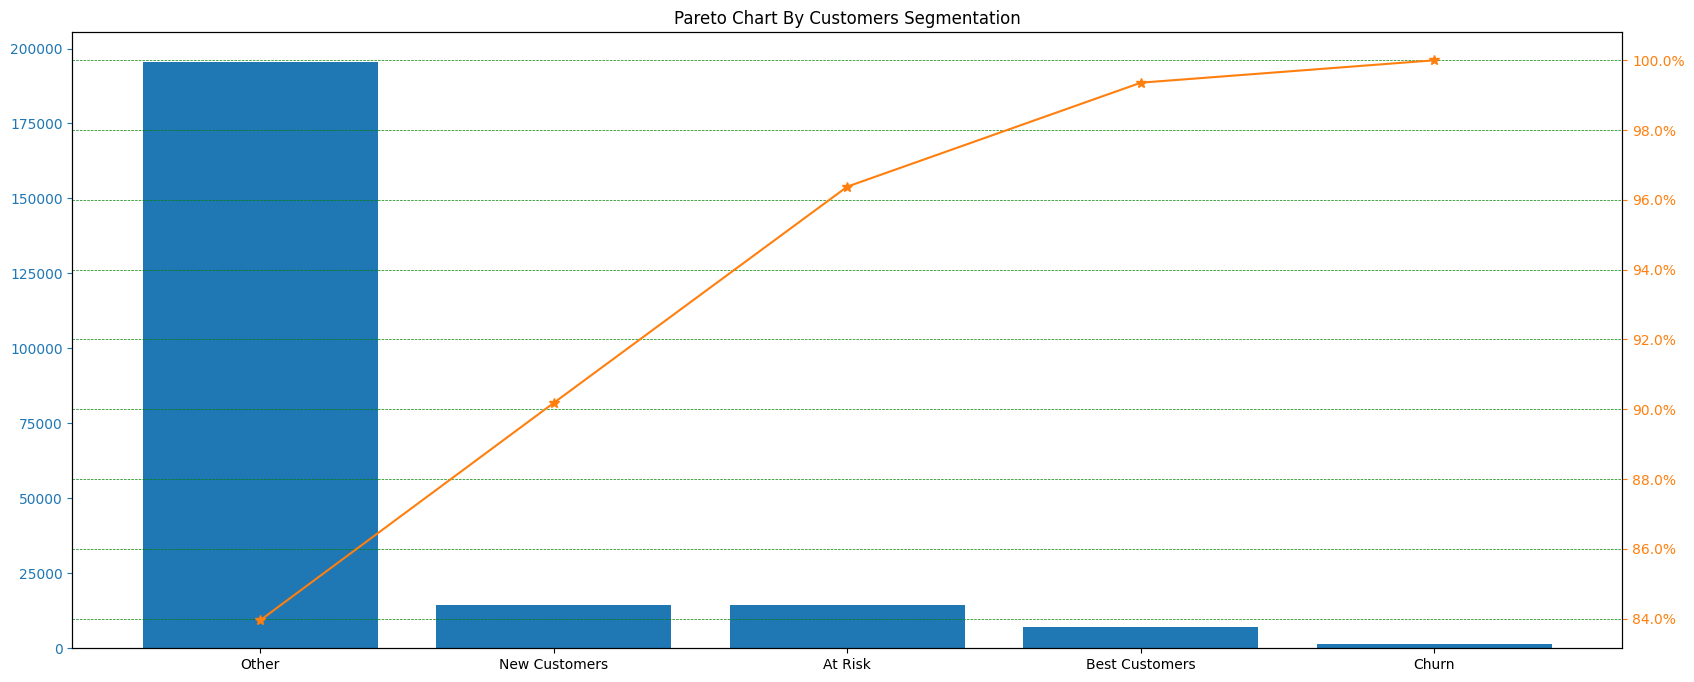

In [28]:
from matplotlib.ticker import PercentFormatter
rfm_summarised = rfm_summarised.sort_values(by="total_M",ascending=False)
rfm_summarised["cumpercentage"] = rfm_summarised["total_M"].cumsum()/rfm_summarised["total_M"].sum()*100
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(rfm_summarised["RFM_Segment"], rfm_summarised["total_M"], color="C0")
ax2 = ax.twinx()
ax2.plot(rfm_summarised["RFM_Segment"], rfm_summarised["cumpercentage"], color="C1", marker="*", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.grid(color = "green", linestyle = "--", linewidth = 0.5)
plt.title ("Pareto Chart By Customers Segmentation")
plt.show()

**Ý nghĩa các thành phần trên biểu đồ**

1. **Nhóm "Other"**  
   - Chiếm phần lớn tổng điểm Monetary (M) – tức là nhóm này đóng góp doanh thu nhiều nhất cho Olis (84%).
   - Đây là nhóm khách hàng trung lập, vãn lai, không thuộc các nhóm đặc biệt như Best Customer, At Risk, ...

2. **Các nhóm còn lại (New Customers, At Risk, Best Customers, Churn):**
   - Đóng góp Monetary nhỏ hơn rất nhiều so với nhóm "Other".
   - Tuy nhiên, các nhóm như "Best Customers" và "At Risk" vẫn có vai trò quan trọng.  Đặc biệt là nhóm "At Risk" khi mà doanh thu của nhóm này cao hơn nhóm "Best Customer" và nhóm "New Customer".

3. **Đường cộng dồn phần trăm (cumpercentage):**
   - Đường này cho thấy chỉ cần nhóm "Other" đã chiếm hơn 80% tổng điểm Monetary.
   - Khi cộng thêm các nhóm khác, tỷ lệ này nhanh chóng đạt gần 100%.

**Tóm lại:**  
Biểu đồ cho thấy phần lớn doanh thu đến từ nhóm khách hàng "Other", còn các nhóm đặc biệt (Best, At Risk, New, Churn) chiếm tỷ trọng nhỏ hơn nhưng lại có giá trị chiến lược trong việc chăm sóc khách hàng.

## Cohort Analysis

### Customer Retention

In [91]:
df["cohort"] = df.groupby("customer_unique_id")["order_purchase_timestamp"].transform("min").dt.to_period("M")
df["order_month"] = df["order_purchase_timestamp"].dt.to_period("M")

In [92]:
# Create cohort dataframe
df_cohort = df.groupby(["cohort", "order_month"]).agg(n_customers=("customer_unique_id", "count")).reset_index(drop=False)

In [93]:
from operator import attrgetter
df_cohort["period_number"] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter("n"))
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2016-09,2016-09,3,0
1,2016-10,2016-10,377,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,2,11


In [95]:
cohort_pivot = df_cohort.pivot_table(index="cohort", columns="period_number", values="n_customers")
cohort_pivot = cohort_pivot.iloc[4:-1,:-2] # Chỉ lấy dữ liệu từ 2017-02 vì trước đó dữ liệu không đầy đủ.
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort,,,,,,,,,,,,,,,,,,
2017-02,1984.0,5.0,6.0,1.0,8.0,2.0,5.0,3.0,1.0,6.0,2.0,5.0,2.0,3.0,2.0,1.0,2.0,8.0
2017-03,3102.0,20.0,10.0,18.0,10.0,4.0,5.0,10.0,11.0,2.0,11.0,4.0,6.0,3.0,5.0,8.0,2.0,5.0
2017-04,2735.0,17.0,8.0,6.0,11.0,7.0,16.0,14.0,7.0,4.0,8.0,4.0,2.0,1.0,2.0,3.0,5.0,NaN
2017-05,4270.0,23.0,26.0,16.0,10.0,20.0,18.0,6.0,11.0,17.0,18.0,12.0,10.0,1.0,10.0,16.0,NaN,NaN
2017-06,3671.0,25.0,18.0,11.0,12.0,12.0,17.0,6.0,5.0,8.0,13.0,13.0,5.0,4.0,7.0,NaN,NaN,NaN
2017-07,4698.0,87.0,21.0,11.0,15.0,9.0,16.0,4.0,9.0,19.0,12.0,14.0,5.0,11.0,NaN,NaN,NaN,NaN
2017-08,4940.0,36.0,23.0,13.0,15.0,22.0,13.0,23.0,9.0,7.0,12.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN
2017-09,4919.0,35.0,23.0,21.0,26.0,15.0,11.0,12.0,12.0,11.0,13.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,5363.0,41.0,14.0,3.0,13.0,10.0,12.0,22.0,15.0,16.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

cohort
2017-02    1984.0
2017-03    3102.0
2017-04    2735.0
2017-05    4270.0
2017-06    3671.0
2017-07    4698.0
2017-08    4940.0
2017-09    4919.0
2017-10    5363.0
2017-11    8722.0
2017-12    6220.0
2018-01    8150.0
2018-02    7674.0
2018-03    8177.0
2018-04    7901.0
2018-05    7897.0
2018-06    7070.0
2018-07    7052.0
Freq: M, Name: 0, dtype: float64

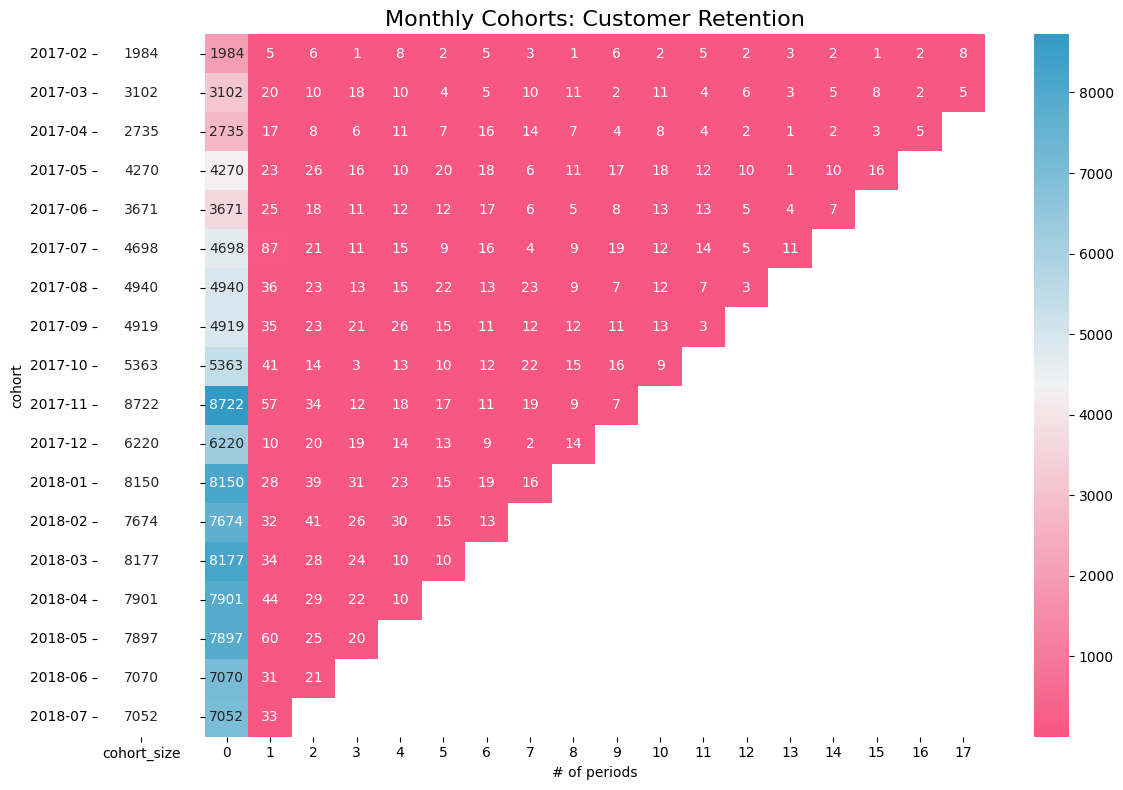

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(cohort_pivot, 
            mask=cohort_pivot.isnull(), 
            annot=True, 
            fmt=".0f", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Retention", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()

In [98]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort,,,,,,,,,,,,,,,,,,
2017-02,1.0,0.002520,0.003024,0.000504,0.004032,0.001008,0.002520,0.001512,0.000504,0.003024,0.001008,0.002520,0.001008,0.001512,0.001008,0.000504,0.001008,0.004032
2017-03,1.0,0.006447,0.003224,0.005803,0.003224,0.001289,0.001612,0.003224,0.003546,0.000645,0.003546,0.001289,0.001934,0.000967,0.001612,0.002579,0.000645,0.001612
2017-04,1.0,0.006216,0.002925,0.002194,0.004022,0.002559,0.005850,0.005119,0.002559,0.001463,0.002925,0.001463,0.000731,0.000366,0.000731,0.001097,0.001828,NaN
2017-05,1.0,0.005386,0.006089,0.003747,0.002342,0.004684,0.004215,0.001405,0.002576,0.003981,0.004215,0.002810,0.002342,0.000234,0.002342,0.003747,NaN,NaN
2017-06,1.0,0.006810,0.004903,0.002996,0.003269,0.003269,0.004631,0.001634,0.001362,0.002179,0.003541,0.003541,0.001362,0.001090,0.001907,NaN,NaN,NaN
2017-07,1.0,0.018519,0.004470,0.002341,0.003193,0.001916,0.003406,0.000851,0.001916,0.004044,0.002554,0.002980,0.001064,0.002341,NaN,NaN,NaN,NaN
2017-08,1.0,0.007287,0.004656,0.002632,0.003036,0.004453,0.002632,0.004656,0.001822,0.001417,0.002429,0.001417,0.000607,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.007115,0.004676,0.004269,0.005286,0.003049,0.002236,0.002440,0.002440,0.002236,0.002643,0.000610,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,1.0,0.007645,0.002610,0.000559,0.002424,0.001865,0.002238,0.004102,0.002797,0.002983,0.001678,NaN,NaN,NaN,NaN,NaN,NaN,NaN


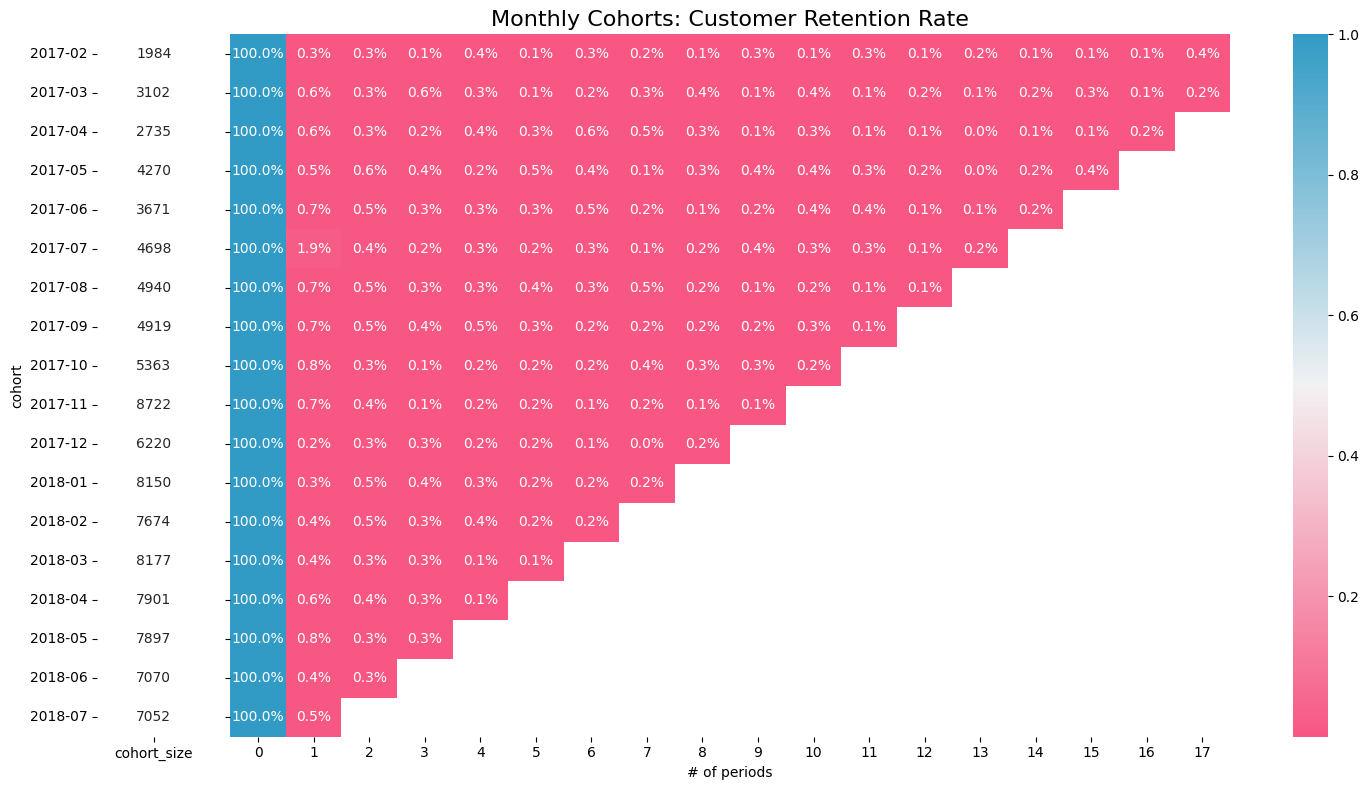

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(retention_matrix, 
            mask=retention_matrix.isnull(), 
            annot=True, 
            fmt=".1%", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Retention Rate", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()

### Customer Churn

In [102]:
base = cohort_pivot[0]
n_customer_churn = cohort_pivot.apply(lambda col: base - col, axis=0)
n_customer_churn[0] = base
n_customer_churn

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort,,,,,,,,,,,,,,,,,,
2017-02,1984.0,1979.0,1978.0,1983.0,1976.0,1982.0,1979.0,1981.0,1983.0,1978.0,1982.0,1979.0,1982.0,1981.0,1982.0,1983.0,1982.0,1976.0
2017-03,3102.0,3082.0,3092.0,3084.0,3092.0,3098.0,3097.0,3092.0,3091.0,3100.0,3091.0,3098.0,3096.0,3099.0,3097.0,3094.0,3100.0,3097.0
2017-04,2735.0,2718.0,2727.0,2729.0,2724.0,2728.0,2719.0,2721.0,2728.0,2731.0,2727.0,2731.0,2733.0,2734.0,2733.0,2732.0,2730.0,NaN
2017-05,4270.0,4247.0,4244.0,4254.0,4260.0,4250.0,4252.0,4264.0,4259.0,4253.0,4252.0,4258.0,4260.0,4269.0,4260.0,4254.0,NaN,NaN
2017-06,3671.0,3646.0,3653.0,3660.0,3659.0,3659.0,3654.0,3665.0,3666.0,3663.0,3658.0,3658.0,3666.0,3667.0,3664.0,NaN,NaN,NaN
2017-07,4698.0,4611.0,4677.0,4687.0,4683.0,4689.0,4682.0,4694.0,4689.0,4679.0,4686.0,4684.0,4693.0,4687.0,NaN,NaN,NaN,NaN
2017-08,4940.0,4904.0,4917.0,4927.0,4925.0,4918.0,4927.0,4917.0,4931.0,4933.0,4928.0,4933.0,4937.0,NaN,NaN,NaN,NaN,NaN
2017-09,4919.0,4884.0,4896.0,4898.0,4893.0,4904.0,4908.0,4907.0,4907.0,4908.0,4906.0,4916.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,5363.0,5322.0,5349.0,5360.0,5350.0,5353.0,5351.0,5341.0,5348.0,5347.0,5354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
cohort_size_churn = n_customer_churn.iloc[:, 0]
cohort_size_churn

cohort
2017-02    1984.0
2017-03    3102.0
2017-04    2735.0
2017-05    4270.0
2017-06    3671.0
2017-07    4698.0
2017-08    4940.0
2017-09    4919.0
2017-10    5363.0
2017-11    8722.0
2017-12    6220.0
2018-01    8150.0
2018-02    7674.0
2018-03    8177.0
2018-04    7901.0
2018-05    7897.0
2018-06    7070.0
2018-07    7052.0
Freq: M, Name: 0, dtype: float64

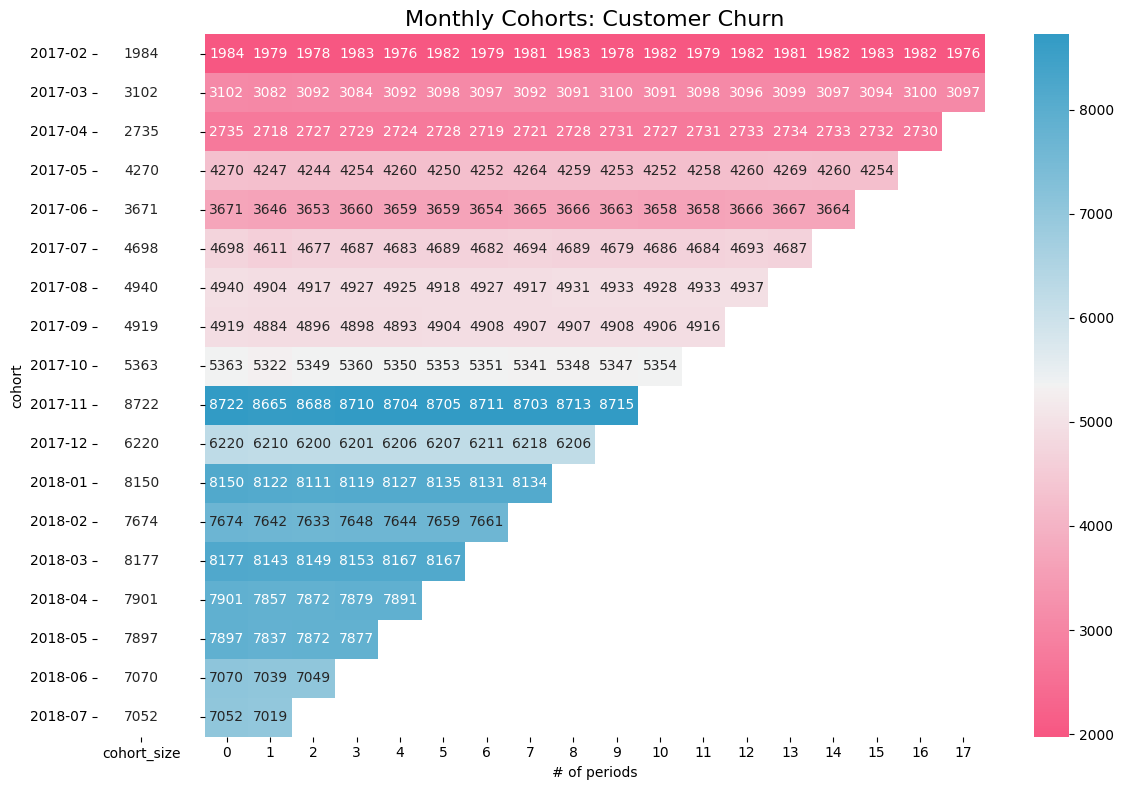

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(n_customer_churn, 
            mask=n_customer_churn.isnull(), 
            annot=True, 
            fmt=".0f", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Churn", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size_churn).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()

In [105]:
churn_rate_matrix = n_customer_churn.divide(cohort_size_churn, axis=0)
churn_rate_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort,,,,,,,,,,,,,,,,,,
2017-02,1.0,0.997480,0.996976,0.999496,0.995968,0.998992,0.997480,0.998488,0.999496,0.996976,0.998992,0.997480,0.998992,0.998488,0.998992,0.999496,0.998992,0.995968
2017-03,1.0,0.993553,0.996776,0.994197,0.996776,0.998711,0.998388,0.996776,0.996454,0.999355,0.996454,0.998711,0.998066,0.999033,0.998388,0.997421,0.999355,0.998388
2017-04,1.0,0.993784,0.997075,0.997806,0.995978,0.997441,0.994150,0.994881,0.997441,0.998537,0.997075,0.998537,0.999269,0.999634,0.999269,0.998903,0.998172,NaN
2017-05,1.0,0.994614,0.993911,0.996253,0.997658,0.995316,0.995785,0.998595,0.997424,0.996019,0.995785,0.997190,0.997658,0.999766,0.997658,0.996253,NaN,NaN
2017-06,1.0,0.993190,0.995097,0.997004,0.996731,0.996731,0.995369,0.998366,0.998638,0.997821,0.996459,0.996459,0.998638,0.998910,0.998093,NaN,NaN,NaN
2017-07,1.0,0.981481,0.995530,0.997659,0.996807,0.998084,0.996594,0.999149,0.998084,0.995956,0.997446,0.997020,0.998936,0.997659,NaN,NaN,NaN,NaN
2017-08,1.0,0.992713,0.995344,0.997368,0.996964,0.995547,0.997368,0.995344,0.998178,0.998583,0.997571,0.998583,0.999393,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.992885,0.995324,0.995731,0.994714,0.996951,0.997764,0.997560,0.997560,0.997764,0.997357,0.999390,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,1.0,0.992355,0.997390,0.999441,0.997576,0.998135,0.997762,0.995898,0.997203,0.997017,0.998322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


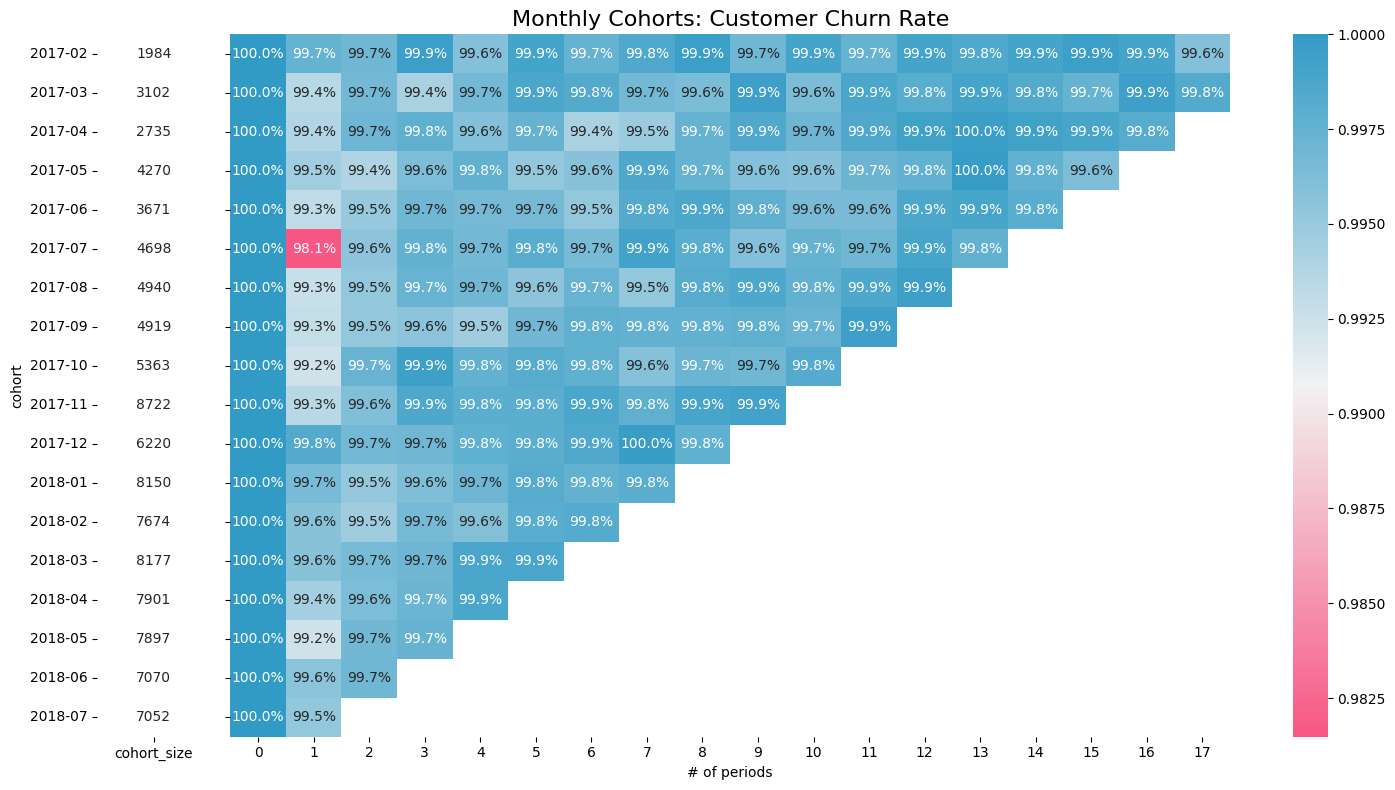

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(churn_rate_matrix, 
            mask=churn_rate_matrix.isnull(), 
            annot=True, 
            fmt=".1%", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Churn Rate", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()

**Phân tích và nhận xét Cohort Retention & Churn**

**Customer Retention (Giữ chân khách hàng)**
- **Tỷ lệ giữ chân khách hàng cực thấp:**  
  - Ở tất cả các cohort, sau tháng đầu tiên, tỷ lệ khách hàng quay lại mua hàng chỉ còn khoảng **0.1% – 0.8%**.
  - Ví dụ: Cohort tháng 2017-07 có 4.698 khách, nhưng chỉ còn 87 khách quay lại ở tháng tiếp theo (~1.9%), các tháng sau giảm mạnh chỉ còn vài chục khách.
- **Số lượng khách quay lại giảm rất nhanh:**  
  - Đa số khách hàng chỉ mua 1 lần, rất ít khách hàng trung thành.
  - Các cohort mới (2018) cũng có xu hướng tương tự, không có dấu hiệu cải thiện retention.

2. **Customer Churn (Mất khách)**
- **Tỷ lệ mất khách cực cao:**  
  - Sau tháng đầu tiên, gần như toàn bộ khách hàng của mỗi cohort đều rời bỏ, không quay lại mua hàng.
  - Ví dụ: Cohort 2017-11 có 8.722 khách, nhưng chỉ còn 57 khách quay lại ở tháng tiếp theo, tức là hơn 99% khách đã churn.
- **Churn diễn ra ngay sau lần mua đầu:**  
  - Đa số khách hàng chỉ phát sinh giao dịch 1 lần rồi rời bỏ nền tảng.

3. **Nhận xét tổng quan**
- **Đặc trưng của Olist:**  
  - Đây là đặc điểm phổ biến của dataset Olist: khách hàng chủ yếu mua 1 lần, rất khó giữ chân.
- **Không phải lỗi dữ liệu:**  
  - Dữ liệu không bị lỗi, mà phản ánh thực tế hành vi khách hàng trên Olist.

**Tóm lại:**  
- Tỷ lệ giữ chân khách hàng của Olist rất thấp, tỷ lệ mất khách cực cao.
- Cần có chiến lược chăm sóc khách hàng sau bán, ưu đãi cho khách cũ, và cải thiện trải nghiệm để tăng retention.

## Business Questions

### Tổng doanh thu mà Olist thu được là bao nhiêu và thay đổi như thế nào theo thời gian?

In [30]:
total_revenue = df["price"].sum()
print(f"Tổng doanh thu Olist: {total_revenue}")

Tổng doanh thu Olist: 1394683022.0


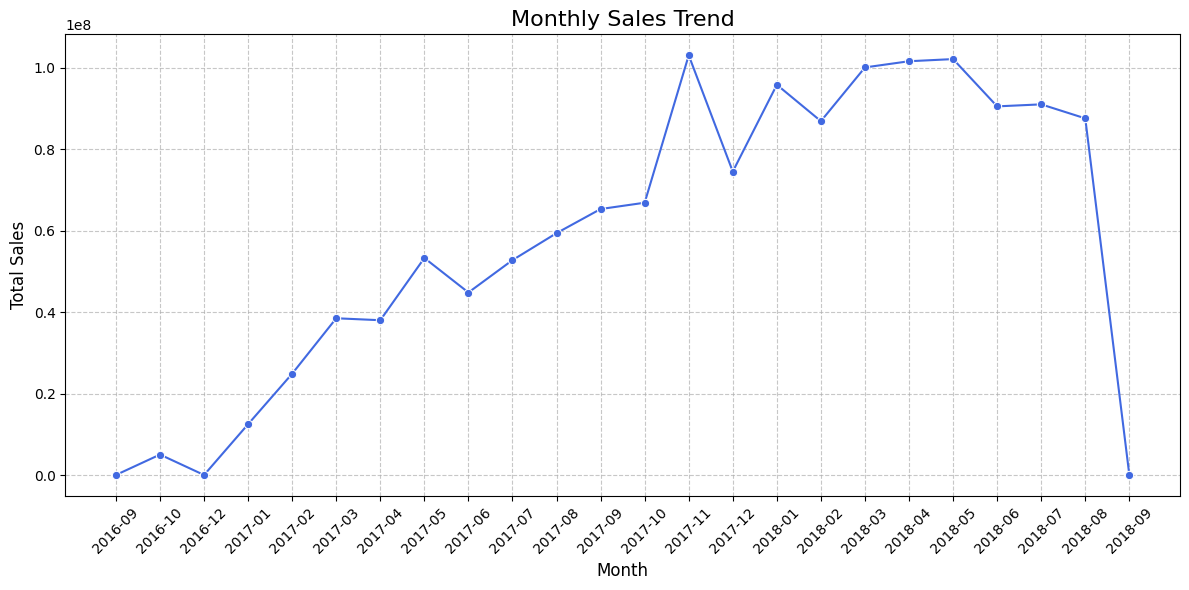

In [31]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Tạo cột tháng
df["order_month"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)

# Tính tổng doanh thu theo tháng
monthly_revenue = df.groupby("order_month")["price"].sum().reset_index()

# Vẽ biểu đồ doanh thu theo tháng
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x="order_month", y="price", marker="o", color="royalblue")

plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

**Phân tích biểu đồ**

1. **Xu hướng tăng trưởng:**
   - Doanh thu tăng mạnh từ cuối năm 2016 đến cuối năm 2017.
   - Giai đoạn đầu (2016-09 đến 2017-03) doanh thu còn thấp mặc dù có tăng và sau đó tăng trưởng rõ rệt.
   - Từ giữa năm 2017 đến giữa năm 2018, doanh thu duy trì ở mức cao, có nhiều tháng đạt đỉnh.

2. **Các đỉnh và đáy:**
   - Đỉnh doanh thu cao nhất rơi vào khoảng tháng 2017-11 và 2018-03/04/05.
   - Một số tháng có biến động mạnh (ví dụ: tháng 2017-11 tăng vọt, sau đó tháng 2017-12 giảm rồi lại tăng trở lại).

3. **Giai đoạn ổn định:**
   - Từ đầu 2018 đến giữa 2018, doanh thu duy trì ổn định ở mức cao (Tuy có giảm ở tháng 2 nhưng  sau đó đã tăng trở lại).

4. **Sụt giảm cuối chuỗi:**
   - Tháng cuối cùng (2018-09) doanh thu gần như bằng 0, do dữ liệu chưa được cập nhật cho tháng này.

**Nhận xét tổng quan**

- **Olist có tốc độ tăng trưởng doanh thu rất tốt trong năm đầu tiên.**
- **Sau khi đạt đỉnh, doanh thu duy trì ổn định ở mức cao, cho thấy hoạt động kinh doanh đã vào giai đoạn phát triển bền vững.**

**Tóm lại:**  
Biểu đồ cho thấy Olist phát triển mạnh mẽ, doanh thu tăng nhanh và duy trì ổn định sau khi đạt đỉnh. Đây là dấu hiệu tích cực về tăng trưởng.

### Có bao nhiêu đơn đặt hàng được đặt trên Olist và số lượng các đơn hàng thay đổi như thế nào theo tháng hoặc mùa?

In [32]:
print(f"Tổng số lượng đơn hàng: {df["order_id"].nunique()}")

Tổng số lượng đơn hàng: 96523


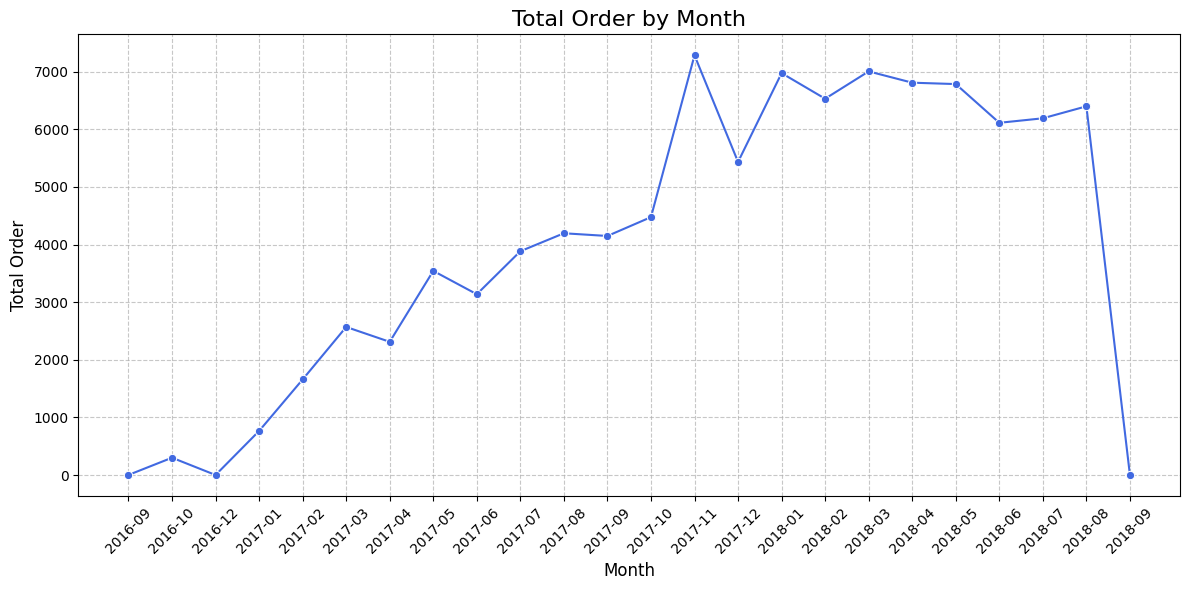

In [33]:
# Tính tổng doanh thu theo tháng
total_order_by_month = df.groupby("order_month")["order_id"].nunique().reset_index()

# Vẽ biểu đồ doanh thu theo tháng
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_order_by_month, x="order_month", y="order_id", marker="o", color="royalblue")

plt.title("Total Order by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Order", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

**Phân tích biểu đồ**

1. **Xu hướng tăng trưởng:**
   - Số lượng đơn hàng tăng mạnh từ cuối năm 2016 đến cuối năm 2017.
   - Giai đoạn đầu (2016-09 đến 2017-03) số lượng đơn hàng còn thấp mặc dù có tăng nhưng sau đó tăng trưởng rõ rệt.
   - Từ giữa năm 2017 đến giữa năm 2018, số đơn hàng duy trì ở mức cao, có nhiều tháng đạt đỉnh.

2. **Các đỉnh và đáy:**
   - Đỉnh cao nhất rơi vào khoảng tháng 2017-11 và 2018-03/04/05 (Điều này cũng giải thích tại sao doanh thu ở các tháng này đạt đỉnh)
   - Một số tháng có biến động mạnh (ví dụ: tháng 2017-11 tăng vọt, sau đó tháng 2017-12 giảm rồi lại tăng trở lại).

3. **Giai đoạn ổn định:**
   - Từ đầu 2018 đến giữa 2018, số đơn hàngduy trì ổn định ở mức cao (Tuy có giảm ở tháng 2 nhưng sau đó đã tăng trở lại).

4. **Sụt giảm cuối chuỗi:**
   - Tháng cuối cùng (2018-09) số đơn hàng gần như bằng 0, do dữ liệu chưa được cập nhật cho tháng này.

**Nhận xét tổng quan**

- **Olist có tốc độ tăng trưởng đơn hàng rất tốt.**
- **Sau khi đạt đỉnh, số đơn hàng duy trì ổn định ở mức cao.**

**Tóm lại:**  
Biểu đồ cho thấy Olist phát triển mạnh mẽ về số lượng đơn hàng, tăng trưởng nhanh và duy trì ổn định sau khi đạt đỉnh.

### Các danh mục sản phẩm phổ biến nhất trên Olist là gì và doanh số bán hàng của chúng khác nhau như thế nào?

#### Các danh mục sản phẩm phổ biến nhất trên Olist?

Tức là tìm  các danh mục sản phẩm được đặt hàng nhiều nhất

In [34]:
popular_categories = df["product_category_name"].value_counts().head(10).reset_index()
popular_categories.columns = ["product_category", "total_orders"]

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

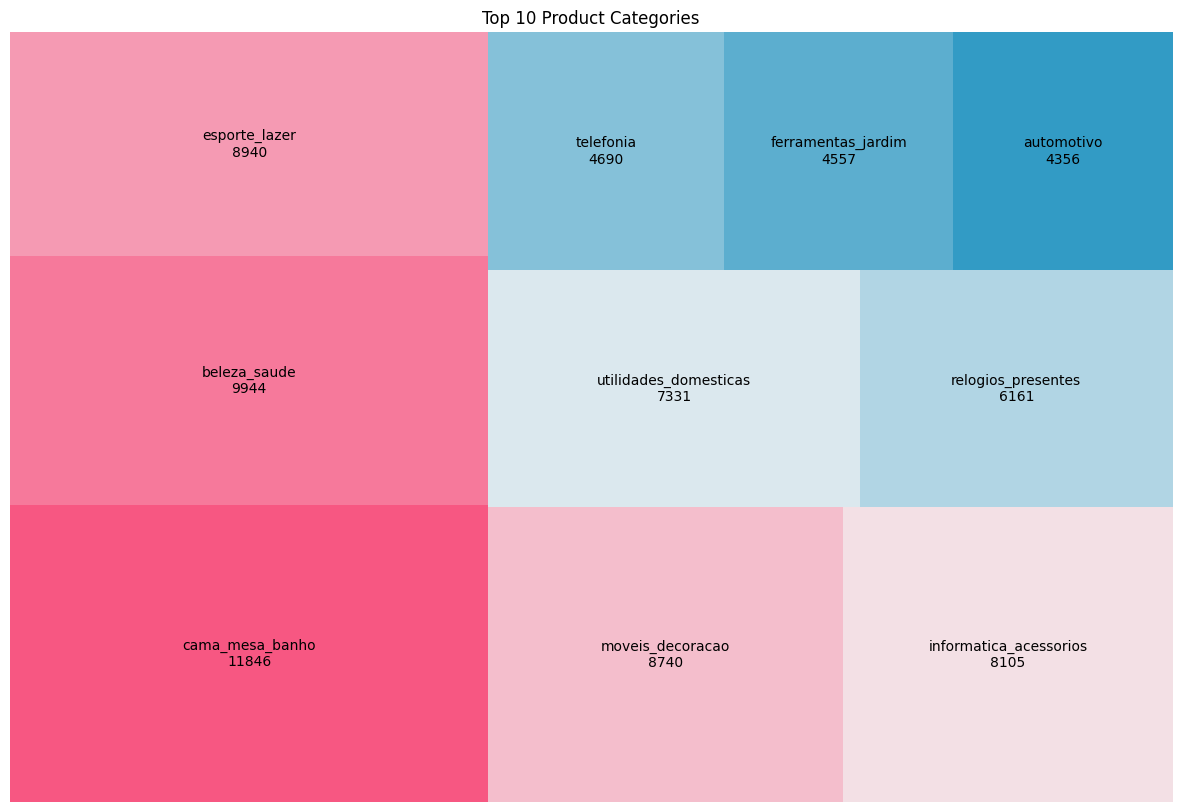

In [35]:
plt.figure(figsize=(15, 10))
squarify.plot(
    popular_categories["total_orders"].to_list(),
    label = popular_categories["product_category"] + "\n" + popular_categories["total_orders"].astype(str),
    color = color(n_colors=10)
)
plt.title ("Top 10 Product Categories")
plt.axis("off")

#### Doanh số bán hàng của chúng khác nhau như thế nào?

In [36]:
product_category_revenue = df.groupby("product_category_name")["price"].sum().reset_index()
product_category_revenue

,product_category_name,price
0,agro_industria_e_comercio,8384195.0
1,alimentos,2966144.0
2,alimentos_bebidas,1642952.0
3,artes,2455707.0
4,artes_e_artesanato,181401.0
...,...,...
68,sinalizacao_e_seguranca,2141453.0
69,tablets_impressao_imagem,682033.0
70,telefonia,33573083.0
71,telefonia_fixa,6114128.0


In [37]:
selected_categories = popular_categories["product_category"].to_list()

filtered_revenue = product_category_revenue[product_category_revenue["product_category_name"].isin(selected_categories)]
filtered_revenue.columns = ["product_category_name",  "Total_Sales"]
filtered_revenue = filtered_revenue.reset_index(drop=True)
filtered_revenue

,product_category_name,Total_Sales
0,automotivo,60891430.0
1,beleza_saude,129088352.0
2,cama_mesa_banho,109563606.0
3,esporte_lazer,102242031.0
4,ferramentas_jardim,51585277.0
5,informatica_acessorios,94499254.0
6,moveis_decoracao,76508112.0
7,relogios_presentes,124578311.0
8,telefonia,33573083.0
9,utilidades_domesticas,66422676.0


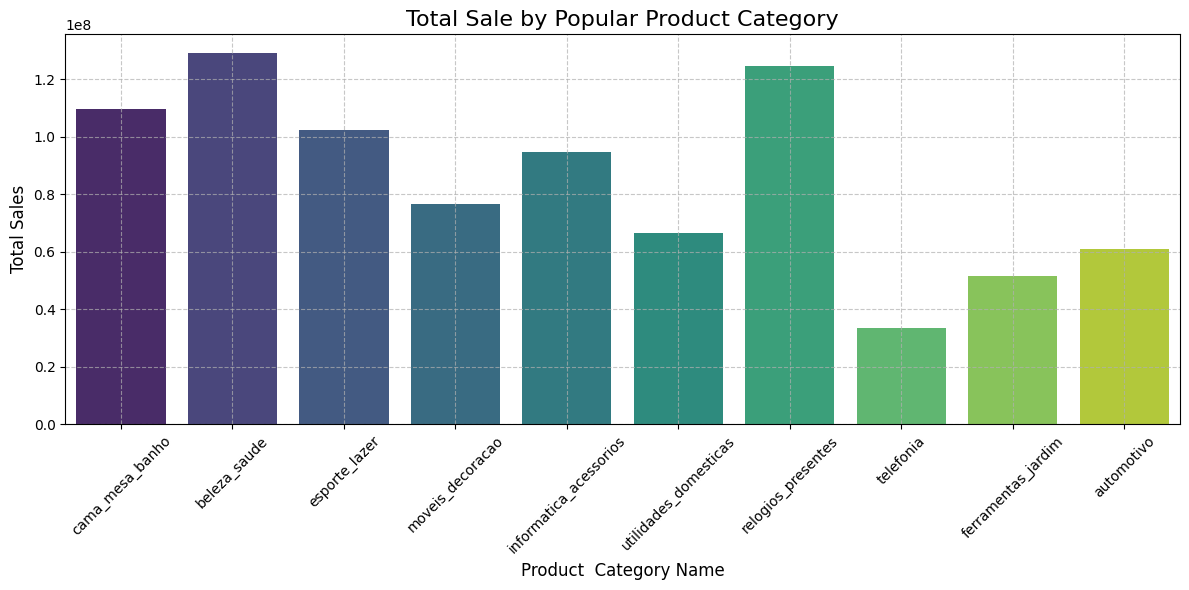

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_revenue, x="product_category_name", y="Total_Sales", palette="viridis", order=selected_categories)

plt.title("Total Sale by Popular Product Category", fontsize=16)
plt.xlabel("Product  Category Name", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

**Phân tích biểu đồ**

- **cama_mesa_banho** có số lượng đơn hàng cao nhất nhưng doanh thu lại thấp hơn **beleza_saude** và **relogios_presentes**. Điều này cho thấy giá trị trung bình mỗi đơn hàng của danh mục **cama_mesa_banho** thấp hơn các danh mục còn lại.
- **beleza_saude** tuy số đơn hàng ít hơn nhưng tổng doanh thu lại cao nhất, chứng tỏ giá trị đơn hàng trung bình của danh mục này rất cao. Đây là danh mục sản phẩm có thể mang lại lợi nhuận lớn dù không cần quá nhiều đơn hàng.
- **automotivo** cũng tương tự, số đơn hàng không nhiều nhưng doanh thu vẫn cao, cho thấy giá trị sản phẩm lớn.
- Các nhóm như **telefonia** và **ferramentas_jardim** vừa có số đơn hàng thấp vừa doanh thu thấp.

**Kết luận:**  
Không phải nhóm sản phẩm nào bán chạy nhất cũng mang lại doanh thu cao nhất. Doanh thu phụ thuộc vào cả số lượng đơn hàng và giá trị trung bình mỗi đơn hàng.

### Giá trị Average Order Value (AOV) trên Olist là bao nhiêu và giá trị này thay đổi như thế nào theo Product Category hoặc Payment Method?

#### Giá trị Average Order Value (AOV) trên Olist là bao nhiêu?

In [39]:
aov = df["price"].sum() / df["order_id"].nunique()
print(f"Average Order Value: {aov}")

Average Order Value: 14449.229945194409


#### Giá trị này thay đổi như thế nào theo Product Category

In [40]:
aov_by_category = df.groupby("product_category_name").agg({
    "price": "sum",
    "order_id": "nunique"
}).reset_index()

aov_by_category["AOV"] = aov_by_category["price"] / aov_by_category["order_id"]
aov_by_category = aov_by_category.sort_values(by="AOV", ascending=False).reset_index(drop=True)
aov_by_category

,product_category_name,price,order_id,AOV
0,pcs,23404661.0,178,131486.859551
1,portateis_casa_forno_e_cafe,4894571.0,75,65260.946667
2,eletrodomesticos_2,12316406.0,232,53087.956897
3,agro_industria_e_comercio,8384195.0,182,46067.005495
4,instrumentos_musicais,20701759.0,622,33282.570740
...,...,...,...,...
68,eletronicos,16291554.0,2531,6436.805215
69,cds_dvds_musicais,73000.0,12,6083.333333
70,fraldas_higiene,156759.0,27,5805.888889
71,flores,100024.0,28,3572.285714


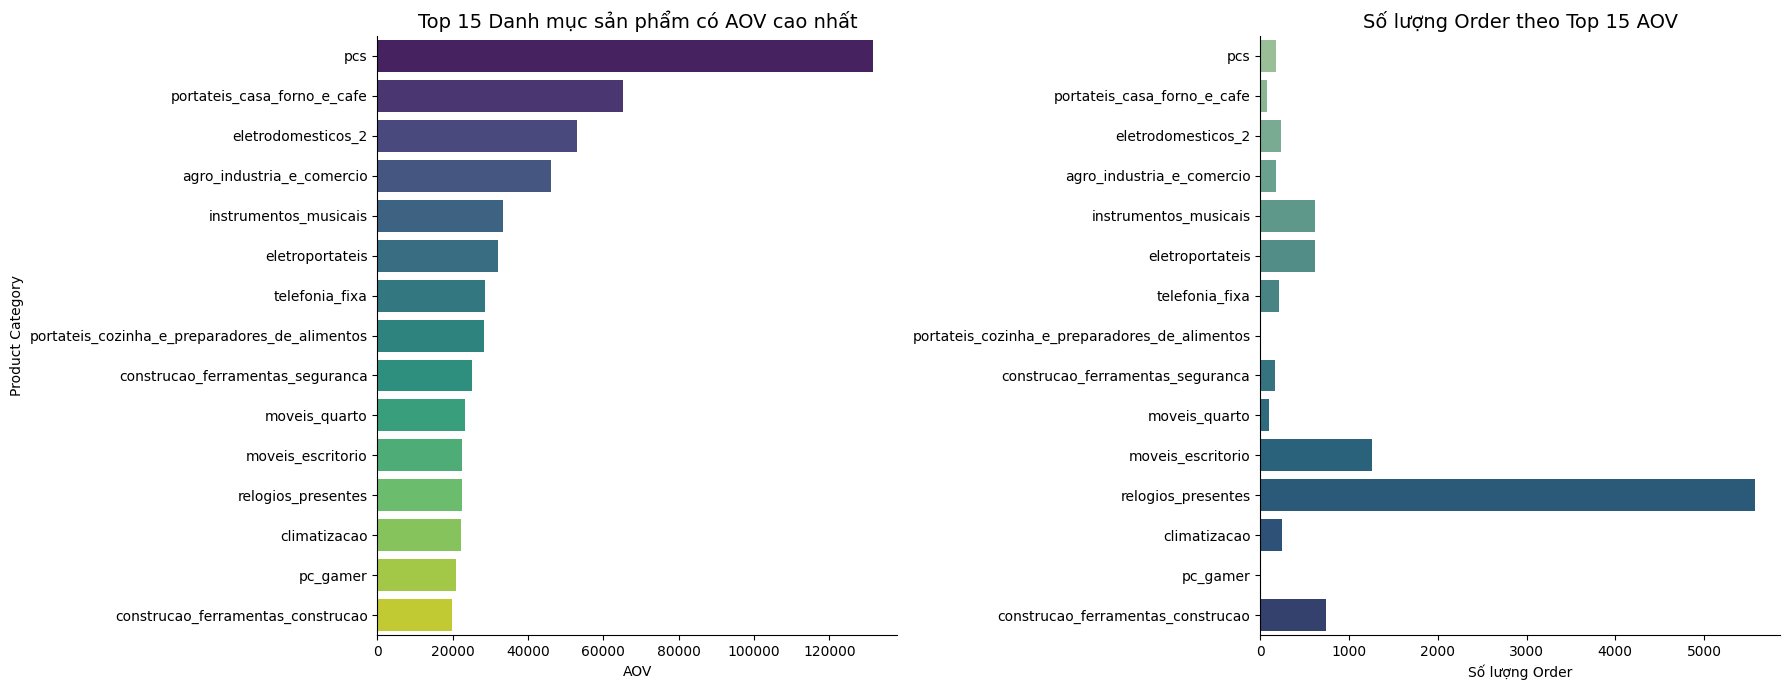

In [41]:
# Chỉ lấy top 15 danh mục theo AOV cao nhất
top_aov_categories = aov_by_category.sort_values(by="AOV", ascending=False).head(15)

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Biểu đồ AOV theo product category
sns.barplot(
    data=top_aov_categories,
    x="AOV",
    y="product_category_name",
    palette="viridis",
    ax=ax[0]
)
ax[0].set_title("Top 15 Danh mục sản phẩm có AOV cao nhất", fontsize=14)
ax[0].set_xlabel("AOV")
ax[0].set_ylabel("Product Category")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

# Biểu đồ số lượng order theo product category
sns.barplot(
    data=top_aov_categories,
    x="order_id",
    y="product_category_name",
    palette="crest",
    ax=ax[1]
)
ax[1].set_title("Số lượng Order theo Top 15 AOV", fontsize=14)
ax[1].set_xlabel("Số lượng Order")
ax[1].set_ylabel("")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()

**Insight**

- **Các danh mục như `pcs`, `portateis_casa_forno_e_cafe`, `eletrodomesticos_2` có AOV rất cao** (trên 50.000, thậm chí hơn 130.000), nhưng số lượng đơn hàng lại rất thấp. Điều này cho thấy đây là các sản phẩm giá trị lớn, không phổ biến, ít người mua.
- **Các danh mục như `relogios_presentes`, `moveis_escritorio` có số lượng đơn hàng cao nhất trong top 15**, nhưng AOV lại không cao bằng các nhóm trên. Đây là các sản phẩm vừa với sức mua của nhiều khách hàng.
- **Phần lớn các danh mục có AOV cao đều là sản phẩm đặc thù, giá trị lớn, không phải là hàng tiêu dùng phổ biến**.

**Kết luận:**  
- Sản phẩm càng đặc thù, giá trị càng lớn thì AOV càng cao nhưng số lượng đơn hàng thường thấp.
- Các danh mục phổ biến hơn có AOV thấp hơn nhưng lại có số lượng đơn hàng lớn.

#### Giá trị này thay đổi như thế nào theo payment_type?

In [42]:
aov_by_payment = df.groupby("payment_type").agg({
    "price": "sum",
    "order_id": "nunique"
}).reset_index()

aov_by_payment["AOV"] = aov_by_payment["price"] / aov_by_payment["order_id"]
aov_by_payment = aov_by_payment.sort_values(by="AOV", ascending=False)
aov_by_payment

,payment_type,price,order_id,AOV
3,voucher,6.413334e+07,3674,17456.000272
1,credit_card,1.078181e+09,74339,14503.565383
0,boleto,2.342572e+08,19196,12203.437227
2,debit_card,1.811195e+07,1487,12180.194351


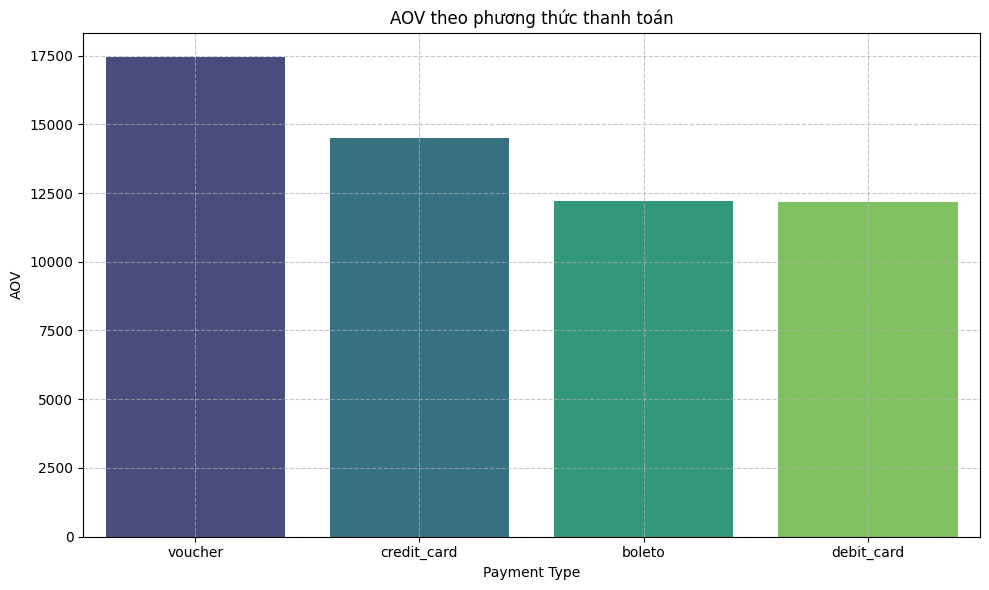

In [43]:
# AOV theo phương thức thanh toán
plt.figure(figsize=(10, 6))
sns.barplot(data=aov_by_payment, x="payment_type", y="AOV", palette="viridis")
plt.title("AOV theo phương thức thanh toán")
plt.ylabel("AOV")
plt.xlabel("Payment Type")
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight**

Giá trị AOV (Average Order Value - Giá trị đơn hàng trung bình) thay đổi rõ rệt theo từng phương thức thanh toán:

- **Voucher** có AOV cao nhất (~17,500), cho thấy các đơn hàng thanh toán bằng voucher thường có giá trị lớn hơn các phương thức khác.
- **Credit card** đứng thứ hai (~14,500), là phương thức phổ biến và cũng có giá trị đơn hàng trung bình cao.
- **Boleto** và **debit card** có AOV thấp hơn (~12,200), cho thấy các đơn hàng thanh toán bằng hai phương thức này thường có giá trị nhỏ hơn.

**Kết luận:**  
Khách hàng sử dụng voucher hoặc thẻ tín dụng thường chi tiêu nhiều hơn cho mỗi đơn hàng so với các phương thức khác.

##  Word Cloud of Review Comments

In [44]:
!pip install wordcloud

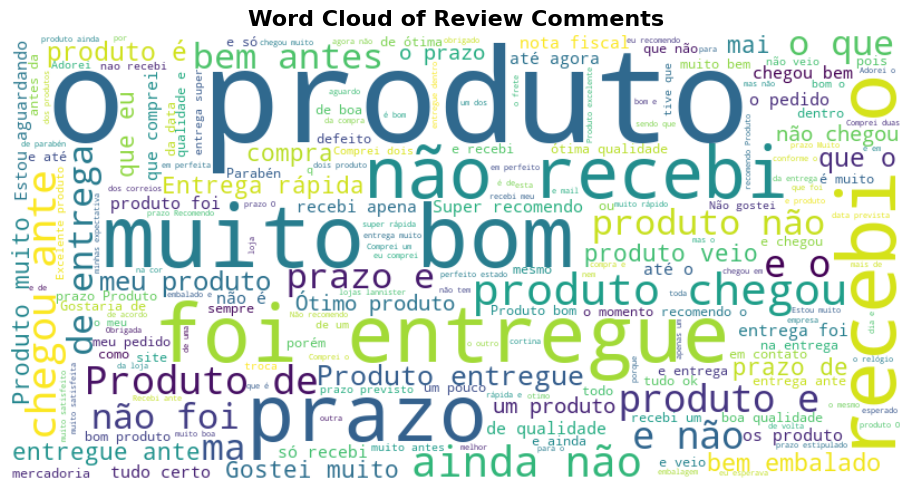

In [45]:
# Refer: https://www.geeksforgeeks.org/python/generating-word-cloud-python
from wordcloud import WordCloud

plt.figure(figsize=(10, 5))

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(" ".join(df["review_comment_message"].dropna()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review Comments", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

**Phân tích Word Cloud Review Comments:**

- Các từ xuất hiện lớn nhất là: **"produto" (sản phẩm)**, **"não recebi" (không nhận được)**, **"foi entregue" (đã giao hàng)**, **"prazo" (thời hạn/giao hàng)**, **"muito bom" (rất tốt)**, **"chegou antes" (đến sớm)**, **"bem embalado" (đóng gói tốt)**.
- Nhiều từ liên quan đến **trải nghiệm giao hàng**: "entregue", "prazo", "chegou", "antes", "entrega rápida" (giao hàng nhanh).
- Một số từ thể hiện **phản hồi tích cực**: "muito bom", "ótimo produto" (sản phẩm rất tốt), "bem embalado".
- Tuy nhiên, cũng có nhiều từ thể hiện **phản hồi tiêu cực**: "não recebi" (không nhận được), "não foi entregue" (không được giao), "ainda não" (vẫn chưa).

**Nhận xét:**

- **Chất lượng sản phẩm** và **dịch vụ giao hàng** được khách hàng nhắc đến nhiều nhất.
- Đa số khách hàng hài lòng với sản phẩm ("muito bom", "ótimo produto"), nhưng vẫn còn nhiều trường hợp **khách hàng phàn nàn về việc không nhận được hàng hoặc giao hàng chậm** ("não recebi", "não foi entregue").
- Các phản hồi tích cực về đóng gói và giao hàng nhanh cũng xuất hiện, cho thấy một phần khách hàng hài lòng với dịch vụ.
- Do đó, Olist nên tiếp tục duy trì chất lượng sản phẩm và cải thiện quy trình giao hàng để giảm các phản hồi tiêu cực về việc không nhận được hàng.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


Dựa trên các phân tích dữ liệu vừa rồi có thể đề xuất một số hướng cải thiện cho Olist như sau:

**1. Cải thiện quy trình giao hàng**
  - Nhiều khách hàng phàn nàn về việc không nhận được hàng hoặc giao hàng chậm (“não recebi”, “não foi entregue”, “prazo”). 
  - Olist nên hợp tác chặt chẽ hơn với các đối tác vận chuyển, tăng cường kiểm soát tiến độ giao hàng, cập nhật trạng thái đơn hàng minh bạch cho khách hàng.

**2. Tăng cường chăm sóc nhóm khách hàng giá trị cao**
  - Nhóm Best Customers và At Risk có giá trị chi tiêu cao, cần có chương trình chăm sóc riêng như ưu đãi, voucher, nhắc nhở quay lại mua hàng, khảo sát ý kiến để giữ chân họ.

**3. Chú trọng nhóm khách hàng mới**
  - Nhóm New Customers là tiềm năng, nên có các chương trình chào mừng, giảm giá lần đầu, hướng dẫn sử dụng dịch vụ để tăng trải nghiệm và tỷ lệ quay lại.

**4. Kiểm soát chất lượng sản phẩm**
  - Đảm bảo sản phẩm đúng mô tả, đóng gói tốt (“bem embalado”), tránh hàng lỗi, hàng không đúng cam kết để giảm phản hồi tiêu cực.

**5. Tối ưu danh mục sản phẩm**
 - Các danh mục có AOV cao nhưng ít đơn hàng nên được quảng bá đúng đối tượng, còn các danh mục phổ biến nên tập trung vào tăng số lượng đơn hàng và tối ưu giá trị trung bình.

**6. Khuyến khích thanh toán qua các phương thức có AOV cao** 
 - Đẩy mạnh các chương trình ưu đãi cho khách hàng thanh toán bằng voucher hoặc credit card để tăng giá trị đơn hàng trung bình.

**7. Phản hồi nhanh các đánh giá tiêu cực** 
 - Chủ động liên hệ, giải quyết các trường hợp khách hàng phản ánh không nhận được hàng hoặc không hài lòng để tăng sự tin tưởng và giữ chân khách.

**Tóm lại:**
Olist nên tập trung vào nâng cao trải nghiệm giao hàng, chăm sóc khách hàng giá trị, kiểm soát chất lượng sản phẩm, tối ưu hóa các danh mục để nhằm mục đích tăng trưởng bền vững và giữ chân được khách hàng. Việc tăng retention dù chỉ 1–2% cũng sẽ tạo ra sự khác biệt lớn về doanh thu lâu dài.